# Logistic Regression Project (Advertisement dataset)

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

In [33]:
## Get the Data


In [35]:
df = pd.read_csv("advertising.csv")

In [37]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [41]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Text(0.5, 0, 'Age')

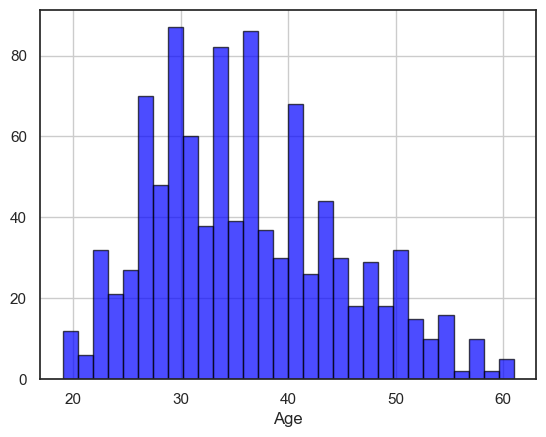

In [44]:
df['Age'].hist(bins =30, color = 'blue', alpha=0.7, edgecolor='black')
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

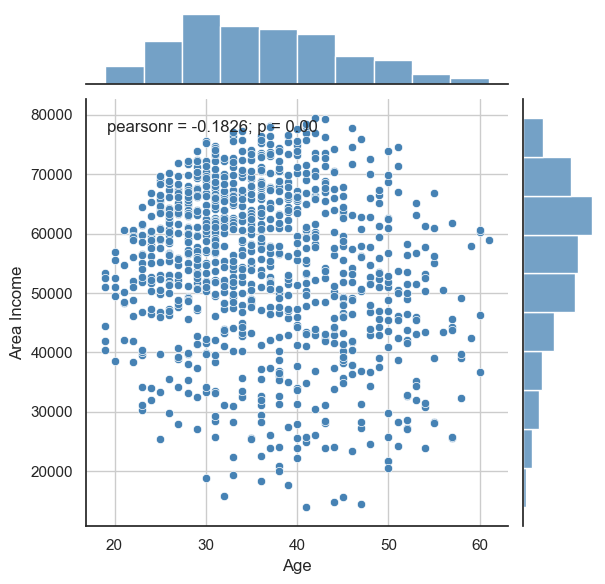

In [48]:
sns.set(style="white", palette="muted")
z = sns.jointplot(
    x="Age", 
    y="Area Income", 
    data=df, 
    kind="scatter", 
    color="steelblue", 
    marginal_kws=dict(bins=10, fill=True)
)

# Calculate Pearson correlation and p-value
corr, p_value = stats.pearsonr(df['Age'], df['Area Income'])

# Annotate the plot with correlation and p-value
z.ax_joint.text(0.05, 0.95, f"pearsonr = {corr:.4f}; p = {p_value:.2f}",
                transform=z.ax_joint.transAxes, 
                fontsize=12, 
                verticalalignment='top')

# Display the plot
plt.grid()
plt.show()


**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

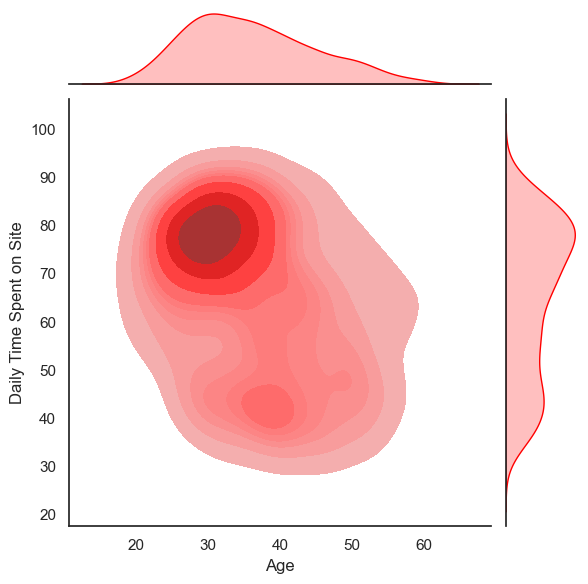

In [90]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df,kind='kde', color='red', fill=True)
plt.grid(False)

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

Text(0.05, 0.95, 'pearsonr = 0.5187; p = 0.00')

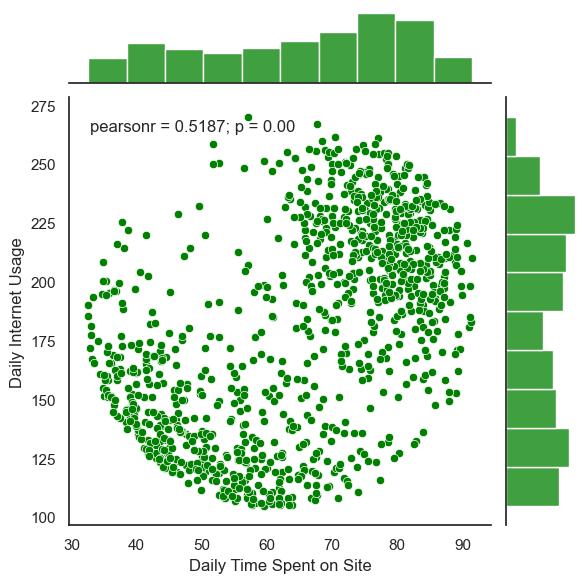

In [93]:
sns.set(style="white", palette="muted")
z = sns.jointplot(
    x="Daily Time Spent on Site", 
    y="Daily Internet Usage", 
    data=df, 
    kind="scatter", 
    color="green", 
    marginal_kws=dict(bins=10, fill=True)
)

corr, p_value = stats.pearsonr(df['Daily Time Spent on Site'], df['Daily Internet Usage'])

# Annotate the plot with correlation and p-value
z.ax_joint.text(0.05, 0.95, f"pearsonr = {corr:.4f}; p = {p_value:.2f}",
                transform=z.ax_joint.transAxes, 
                fontsize=12, 
                verticalalignment='top')



**create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

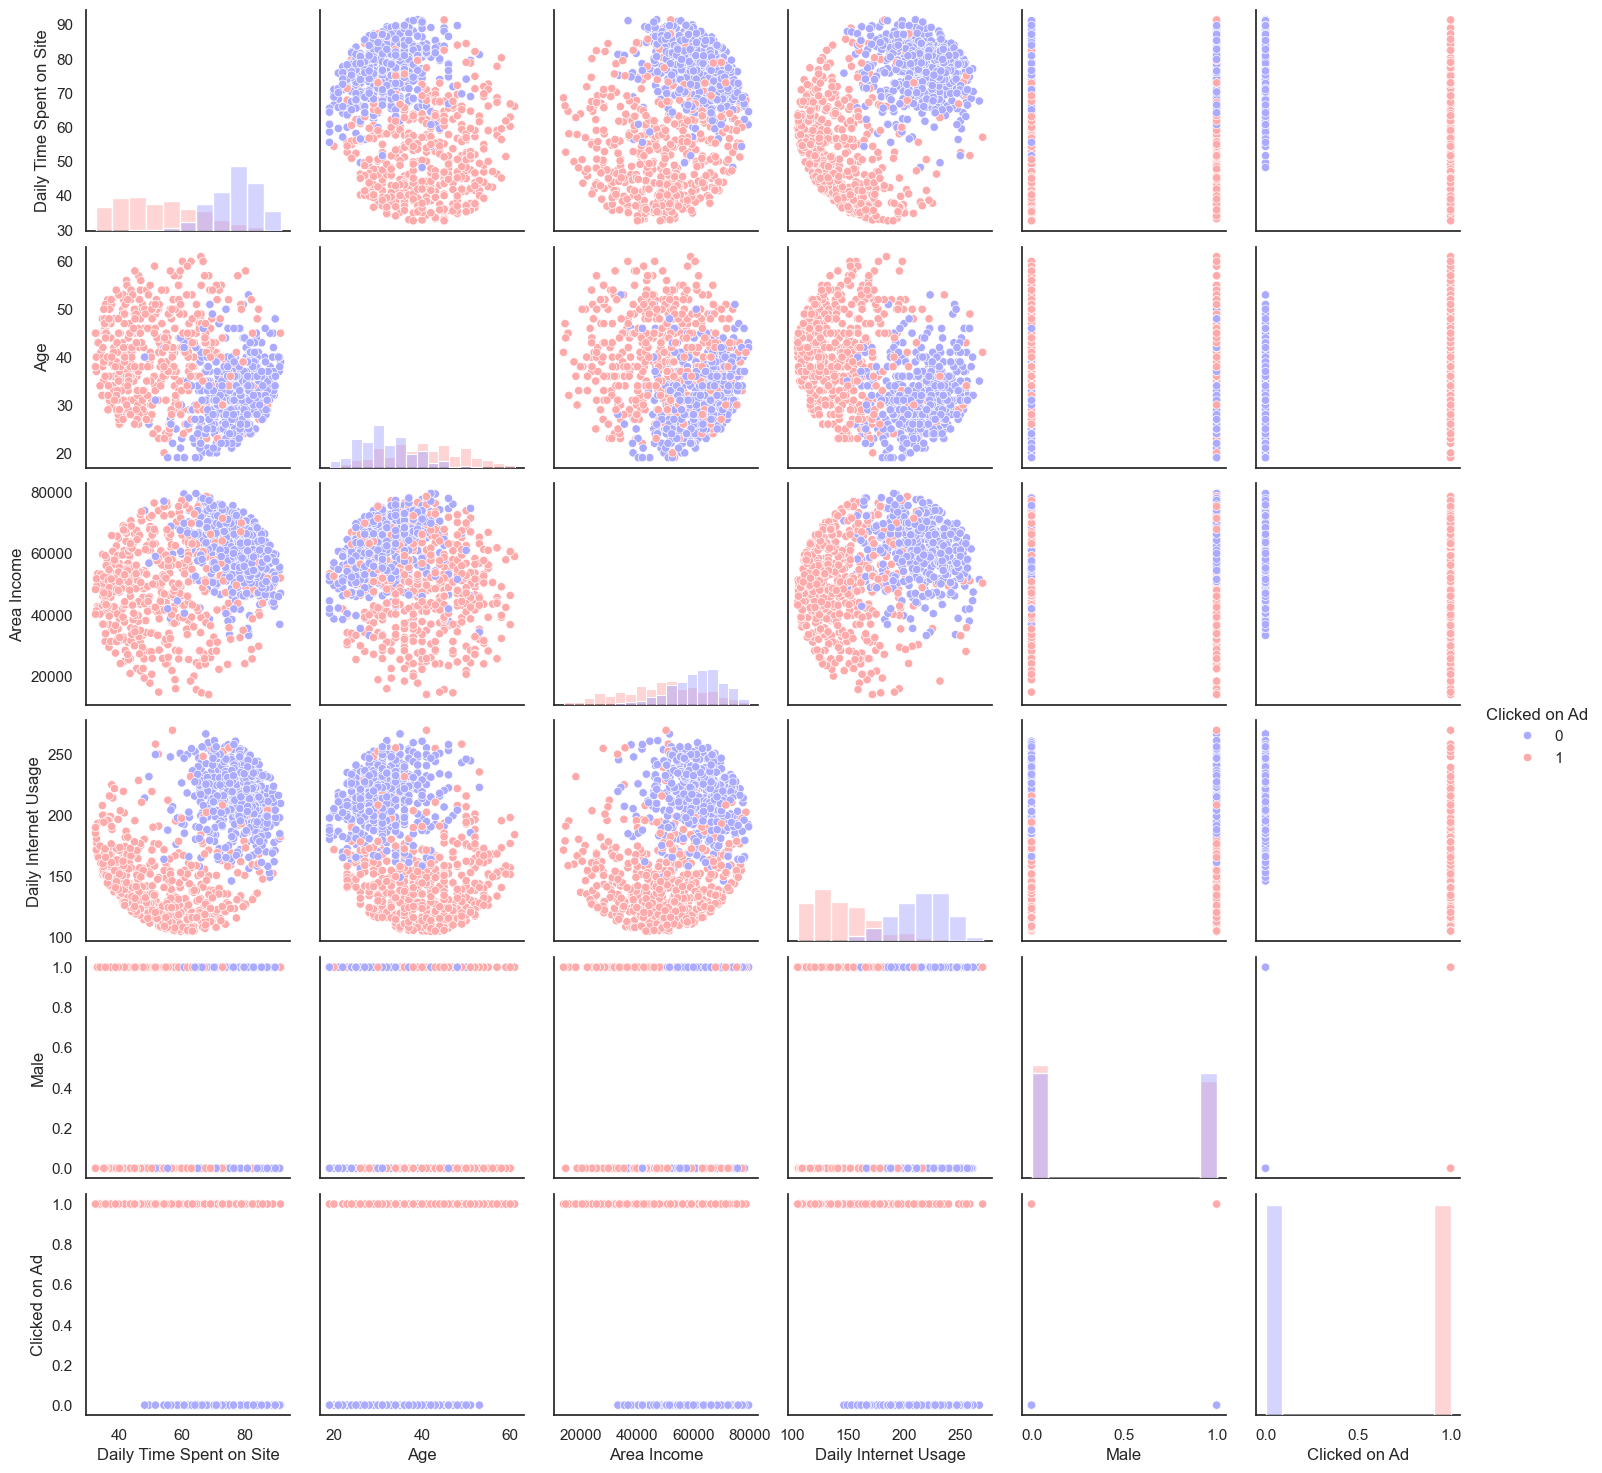

In [97]:
sns.pairplot(df, hue ='Clicked on Ad', palette='bwr', diag_kind='hist',
             vars=['Daily Time Spent on Site', 'Age', 'Area Income',
                    'Daily Internet Usage', 'Male', 'Clicked on Ad'])
             

# Logistic Regression

Now it's time to do a train test split, and train our model!

**Split the data into training set and testing set using train_test_split**


In [102]:
from sklearn.model_selection import train_test_split

In [108]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]

In [110]:
y = df['Clicked on Ad']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Train and fit a logistic regression model on the training set.**

In [115]:
from sklearn.linear_model import LogisticRegression

In [117]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\wwwmu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations
**Now predict values for the testing data.**

In [124]:
prediction = logmodel.predict(X_test)

**Create a classification report for the model.**

In [129]:
from sklearn.metrics import classification_report

In [133]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.95      0.85      0.90       168

    accuracy                           0.90       330
   macro avg       0.91      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330



## END